# 3D Tracking Competition

To help make it easier for you to participate in our 3D Tracking challenge, we provide an example notebook for the task

## Check Data Format

Here the goal is to show you how to package the results into a submission-ready file. Thus, for simplicity, we will assume your output is already in the data folder, specifically in the `[log_id]/per_sweep_annotations_amodal/`

To check that the data is in the correct format, make sure you can visualize the labels in the following block

ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 118.257336 > 100.0 ms
ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 118.252632 > 100.0 ms
ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 100.002096 > 100.0 ms
ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 120.935344 > 100.0 ms
ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 120.9344 > 100.0 ms
ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 117.39392 > 100.0 ms
ERROR:argoverse.data_loading.synchronization_database:No corresponding image: 117.396904 > 100.0 ms


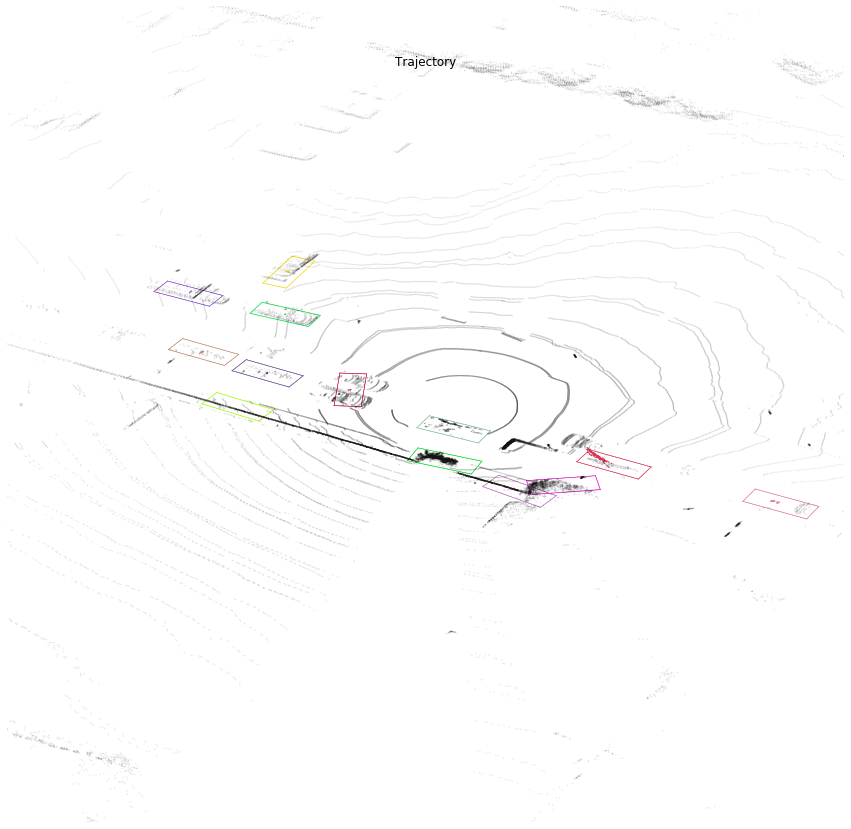

In [7]:
import argoverse
from argoverse.data_loading.argoverse_tracking_loader import ArgoverseTrackingLoader
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import argoverse.visualization.visualization_utils as viz_util


#path to argoverse tracking dataset test set, this folder should contain per_sweep_annotations_amodal for the labels
data_dir = '~/argoverse-tracking/test/'

argoverse_loader = ArgoverseTrackingLoader(data_dir)

argoverse_data = argoverse_loader[0]
f3 = plt.figure(figsize=(15, 15))
ax3 = f3.add_subplot(111, projection='3d')  
idx=30 # current time frame
viz_util.draw_point_cloud_trajectory(
        ax3, 
        'Trajectory', 
        argoverse_data,idx,axes=[0, 1],xlim3d=(-15,15),ylim3d=(-15,15) # X and Y axes
    )
plt.axis('off')
plt.show()

## generate submission file

In [38]:
import tempfile
import shutil
import zipfile
import os

dirpath = tempfile.mkdtemp()

output_dir = 'competition_files/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for log_id in os.listdir(data_dir):
    if log_id.startswith('.'):
        continue
    shutil.copytree(os.path.join(data_dir,log_id,'per_sweep_annotations_amodal'),os.path.join(dirpath,log_id,'per_sweep_annotations_amodal'))
    
shutil.make_archive(os.path.join(output_dir,'argoverse_tracking'), 'zip',dirpath)
shutil.rmtree(dirpath)

You are all set!! 

Simply upload `competition_files/argoverse_tracking.zip` to our evaluation server on https://evalai.cloudcv.org/ and see how well you did it